In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [16]:
df=pd.read_csv('datatraining.txt')

In [17]:
dates = pd.to_datetime(df['date'], infer_datetime_format=True)
df['day'] = dates.dt.day
df['month'] = dates.dt.month
df['year'] = dates.dt.year

In [18]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,month,year
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,4,2,2015
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,4,2,2015
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,4,2,2015
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,4,2,2015
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,4,2,2015


In [19]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,month,year
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.0,8143.0
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330,7.075525,2.0,2015.0
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982,1.674896,0.0,0.0
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,4.000000,2.0,2015.0
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000,6.000000,2.0,2015.0
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000,7.000000,2.0,2015.0
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000,8.000000,2.0,2015.0
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,10.000000,2.0,2015.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 10 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
day              8143 non-null int64
month            8143 non-null int64
year             8143 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 699.8+ KB


Text(0, 0.5, 'Occupancy frequency')

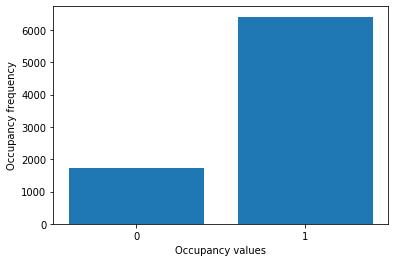

In [19]:
plt.bar(x=df.Occupancy.unique(), height=df.Occupancy.value_counts())
plt.xticks(df.Occupancy.unique())
plt.xlabel('Occupancy values')
plt.ylabel('Occupancy frequency')

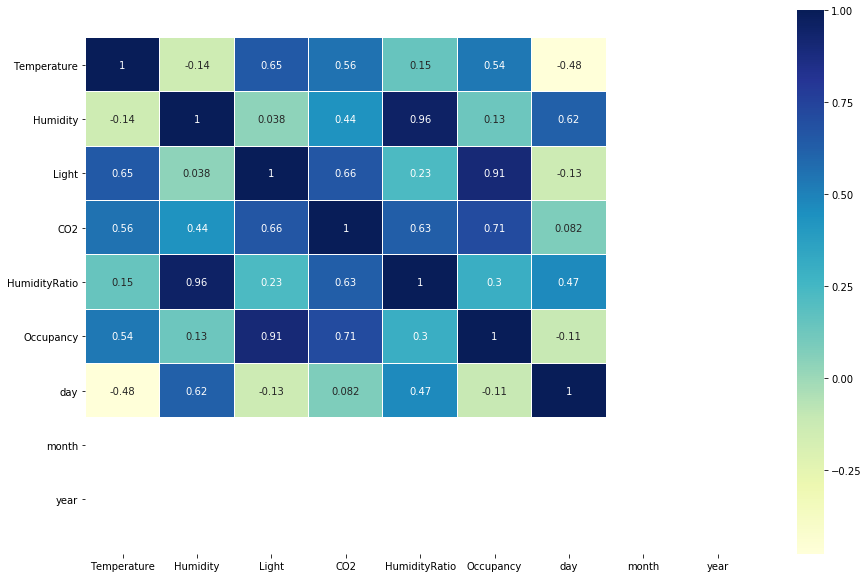

In [21]:

#Correlation Pearson (linear correlation)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot = True, linewidth=0.1, cmap='YlGnBu')
#To fix matplot error
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##
plt.show()

In [21]:
df.HumidityRatio.corr(df.Humidity)

0.9551980832358546

In [23]:
df['date']

1       2015-02-04 17:51:00
2       2015-02-04 17:51:59
3       2015-02-04 17:53:00
4       2015-02-04 17:54:00
5       2015-02-04 17:55:00
6       2015-02-04 17:55:59
7       2015-02-04 17:57:00
8       2015-02-04 17:57:59
9       2015-02-04 17:58:59
10      2015-02-04 18:00:00
11      2015-02-04 18:01:00
12      2015-02-04 18:02:00
13      2015-02-04 18:03:00
14      2015-02-04 18:04:00
15      2015-02-04 18:04:59
16      2015-02-04 18:06:00
17      2015-02-04 18:07:00
18      2015-02-04 18:08:00
19      2015-02-04 18:08:59
20      2015-02-04 18:10:00
21      2015-02-04 18:10:59
22      2015-02-04 18:11:59
23      2015-02-04 18:13:00
24      2015-02-04 18:14:00
25      2015-02-04 18:15:00
26      2015-02-04 18:16:00
27      2015-02-04 18:16:59
28      2015-02-04 18:17:59
29      2015-02-04 18:19:00
30      2015-02-04 18:20:00
               ...         
8114    2015-02-10 09:04:00
8115    2015-02-10 09:04:59
8116    2015-02-10 09:06:00
8117    2015-02-10 09:07:00
8118    2015-02-10 0

In [11]:
dates = pd.to_datetime(df['date'], infer_datetime_format=True)
df['day'] = dates.dt.day
df['month'] = dates.dt.month
df['year'] = dates.dt.year

In [12]:
df.day.value_counts()

7     1440
6     1440
9     1440
5     1440
8     1440
10     574
4      369
Name: day, dtype: int64

In [13]:
df.month.value_counts()

2    8143
Name: month, dtype: int64

In [14]:
df.year.value_counts()

2015    8143
Name: year, dtype: int64